In [38]:
import diff_classifier
from diff_classifier import features as ft
import pandas as pd
import numpy as np
import tqdm
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('~/Documents/software/diff_classifier/msd_100X_Striatum_Slice2_Video1.csv')
#/Users/zeelabuser/Documents/software/diff_classifier/msd_100X_Striatum_Slice2_Video1.csv


In [7]:
data

,Unnamed: 0,Frame,Track_ID,X,Y,MSDs,Gauss,Quality,SN_Ratio,Mean_Intensity
0,0,0.0,0.0,284.533759,544.186279,0.000000,0.000000,30.643402,1.052989,327.113122
1,1,1.0,0.0,288.818331,545.508796,4.636685,0.814706,25.540253,1.238280,318.900452
2,2,2.0,0.0,289.195358,548.357710,10.330469,0.919903,27.255646,1.197739,321.778281
3,3,3.0,0.0,289.614121,548.087379,15.574142,0.901243,25.531494,1.235529,317.049774
4,4,4.0,0.0,289.950351,546.598162,20.243039,0.752496,29.692139,1.096836,326.832579
...,...,...,...,...,...,...,...,...,...,...
35149,7807,646.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35150,7808,647.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35151,7809,648.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35152,7810,649.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
out = ft.unmask_track(data)
out

,Frame,Track_ID,X,Y,MSDs,Gauss,Quality,SN_Ratio,Mean_Intensity
0,0.0,0.0,284.533759,544.186279,0.000000,0.000000,30.643402,1.052989,327.113122
1,1.0,0.0,288.818331,545.508796,4.636685,0.814706,25.540253,1.238280,318.900452
2,2.0,0.0,289.195358,548.357710,10.330469,0.919903,27.255646,1.197739,321.778281
3,3.0,0.0,289.614121,548.087379,15.574142,0.901243,25.531494,1.235529,317.049774
4,4.0,0.0,289.950351,546.598162,20.243039,0.752496,29.692139,1.096836,326.832579
...,...,...,...,...,...,...,...,...,...
3156,8.0,53.0,978.983545,96.168667,19.519389,0.616644,14.247925,2.019356,341.624434
3157,9.0,53.0,979.769582,94.490465,29.930296,0.653749,13.856171,1.803116,340.941176
3158,10.0,53.0,978.982513,94.383522,35.111014,0.492807,9.066010,1.214040,316.891403
3159,11.0,53.0,978.641950,92.850748,34.667478,0.543086,8.624207,1.160114,314.891403


In [30]:
out['Frame'].max()

310.0

In [31]:
test_track = out[out['Track_ID']==53.0]
test_track['Frame'].max()

12.0

In [28]:
small_test_track = test_track[test_track['Frame']<10]
small_test_track

,Frame,Track_ID,X,Y,MSDs,Gauss,Quality,SN_Ratio,Mean_Intensity
3148,0.0,53.0,978.357652,99.669575,0.000000,0.000000,9.401794,1.365667,315.837104
3149,1.0,53.0,977.643369,99.468952,3.070894,1.120086,9.429291,1.303689,314.194570
3150,2.0,53.0,980.147536,100.413642,4.348021,0.940950,9.593689,1.336345,313.262443
3151,3.0,53.0,979.355920,96.769442,5.455173,0.792294,10.110474,1.505079,319.746606
3152,4.0,53.0,978.831680,96.304372,7.504148,0.914875,11.917755,1.680843,330.674208
3153,5.0,53.0,979.189850,96.825817,9.010231,0.786127,13.161224,1.604546,332.271493
3154,6.0,53.0,978.622831,95.364528,11.333935,0.668049,11.480988,1.671325,328.420814
3155,7.0,53.0,978.218660,95.529599,14.459147,0.731732,12.308228,1.827551,332.574661
3156,8.0,53.0,978.983545,96.168667,19.519389,0.616644,14.247925,2.019356,341.624434
3157,9.0,53.0,979.769582,94.490465,29.930296,0.653749,13.856171,1.803116,340.941176


In [35]:
alpha_dict = {}

pbar = tqdm.tqdm(total=len(out['Track_ID'].unique()))
for track in out['Track_ID'].unique():
    track_data = out[out['Track_ID']==track]
    alpha_list = []
    for i in range(10, int(track_data['Frame'].max())+1):
        subset = track_data[track_data['Frame']<i]
        alpha, dcoef = ft.alpha_calc(subset)
        alpha_list.append(alpha)
    alpha_dict[track] = alpha_list
    pbar.update(1)
# for track in tqdm(out['Track_ID'].unique()):
#     track_data = out[out['Track_ID']==track]
#     alpha_list = []
#     # for i in range(10, track_data['Frame'].max()+1):
#     #     subset = track_data[track_data['Frame']<i]
#     #     alpha, dcoef = ft.alpha_calc(subset)
#     #     alpha_list.append(alpha)
#     alpha_dict[track] = alpha_list

  0%|          | 0/54 [00:28<?, ?it/s]


In [36]:
alpha_dict

{0.0: [0.7963998242262067,
  0.767975481775834,
  0.7580628783925649,
  0.7646167262326781,
  0.7810032204398675,
  0.8024729041594079,
  0.8269806937883192,
  0.8503825997757459,
  0.874474989883178,
  0.9001988236096949,
  0.9188116407150474,
  0.9312816737390843,
  0.9434219171827476,
  0.9555788724091718,
  0.9686686831254667,
  0.9713243363229656,
  0.9680828414547843,
  0.9619552528855323,
  0.955990449140659,
  0.9503457427094535,
  0.943571732590944,
  0.9352021102880542,
  0.9226817831612313,
  0.9088848754235528,
  0.8921828699203693,
  0.871645145263763,
  0.8463840743411237,
  0.8177914996846153,
  0.7891104970868901,
  0.7614592875726256,
  0.7340276187240312,
  0.7045033859299669,
  0.6733210113222793,
  0.6417284683086741,
  0.6107882632369921,
  0.5805602831484346,
  0.5503155088133913,
  0.5210882780811315,
  0.4940655612358389,
  0.4688674144853727,
  0.445358288921703,
  0.42353185212068845,
  0.40343116140738766,
  0.3846193926373752,
  0.3671201827368622,
  0.35051

In [97]:
metric_holder = []

for i in range(1, len(alpha_dict[40])):
    val = alpha_dict[40][i] / alpha_dict[40][0]
    metric_holder.append(val)

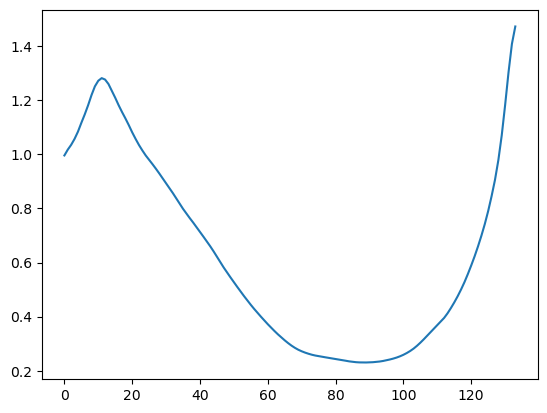

In [98]:
plt.plot(metric_holder)

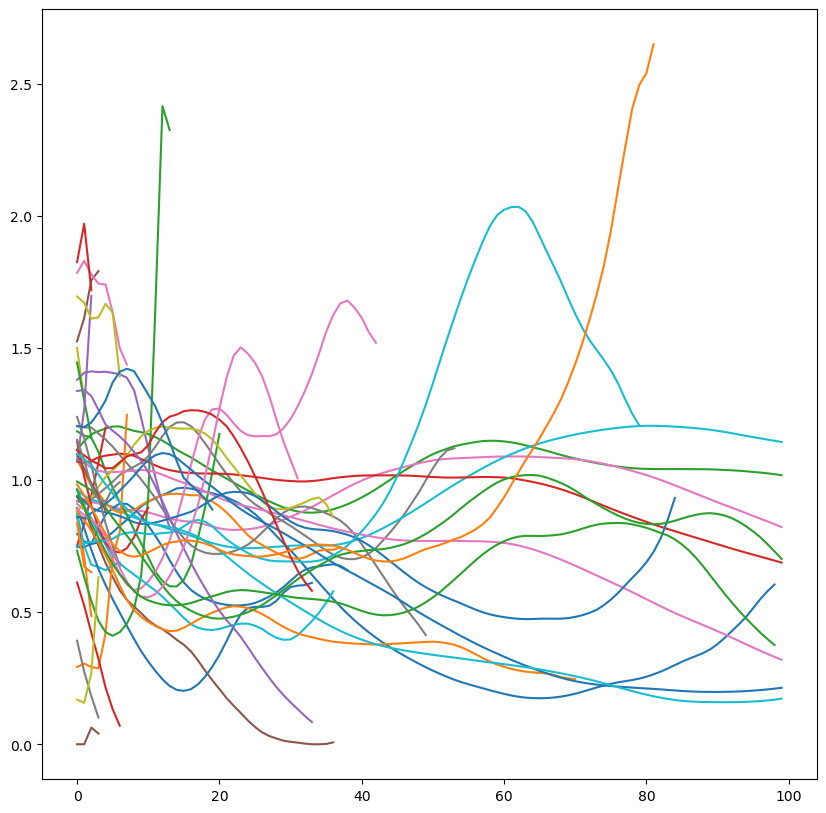

In [91]:
fig = plt.figure(figsize=(10, 10))

for track in alpha_dict.keys():
    plt.plot(alpha_dict[track][:100])